In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [16]:
adata=sc.read_csv('yan_imputed_t.csv',delimiter=',', first_column_names=None, dtype='float32')

In [17]:
adata.X

array([[8.54229  , 3.4193788, 1.5237433, ..., 5.530042 , 4.4773808,
        4.855153 ],
       [8.275977 , 3.9180498, 2.012057 , ..., 5.1723847, 5.270711 ,
        4.816434 ],
       [8.199267 , 3.6672635, 2.3705823, ..., 5.1373034, 5.2444205,
        4.8303337],
       ...,
       [8.645473 , 0.5432382, 0.7522853, ..., 7.519722 , 1.2380399,
        4.4693775],
       [8.853652 , 0.       , 1.0843407, ..., 6.777161 , 1.7579303,
        4.796074 ],
       [8.700382 , 1.9719397, 3.1912594, ..., 6.563143 , 3.7908225,
        3.9390547]], dtype=float32)

In [18]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

In [19]:
adata

AnnData object with n_obs × n_vars = 90 × 4725
    obs: 'n_genes'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

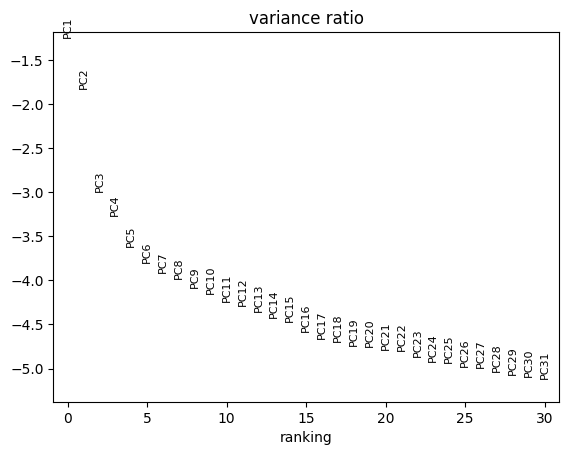

In [20]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata2)
##visualizing clusters
#sc.pl.umap(adata2, color=['leiden'])

/home/zaman/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


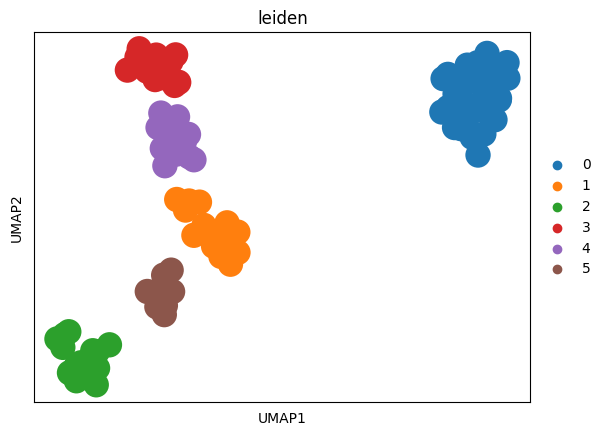

In [22]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [23]:
adata.obs['leiden']

0     3
1     3
2     3
3     3
4     3
     ..
85    0
86    0
87    0
88    0
89    0
Name: leiden, Length: 90, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
sil

0.12696916

In [25]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('yan_celltype.csv',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_25129/203101203.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('yan_celltype.csv',dtype=None, delimiter=",")


In [26]:
l1

array([b'zygote', b'zygote', b'zygote', b'zygote', b'zygote', b'zygote',
       b'2cell', b'2cell', b'2cell', b'2cell', b'2cell', b'2cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'4cell', b'4cell', b'4cell', b'4cell', b'4cell', b'4cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'8cell', b'8cell', b'8cell', b'8cell',
       b'8cell', b'8cell', b'16cell', b'16cell', b'16cell', b'16cell',
       b'16cell', b'16cell', b'16cell', b'16cell', b'16cell', b'16cell',
       b'16cell', b'16cell', b'16cell', b'16cell', b'16cell', b'16cell',
       b'blast', b'blast', b'blast', b'blast', b'blast', b'blast',
       b'blast', b'blast', b'blast', b'blast', b'blast', b'blast',
       b'blast', b'blast', b'blast', b'blast', b'blast', b'blast',
       b'blast', b'blast', b'blast', b'blast', b'blast', b'blast',
       b'blast', b'blast', b'blast', b'b

In [27]:
l2

0     3
1     3
2     3
3     3
4     3
     ..
85    0
86    0
87    0
88    0
89    0
Name: leiden, Length: 90, dtype: category
Categories (6, object): ['0', '1', '2', '3', '4', '5']

In [28]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

0.85754979146273